**IMPORTING EXCEL SHEET**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving SampleSuperstore.xlsx to SampleSuperstore.xlsx


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [4]:
pd.ExcelFile("SampleSuperstore.xlsx").sheet_names


['SampleSuperstore',
 'Category_sales_pivot',
 'sub-category_profitability',
 'Region-wise_performance',
 'ship-mode_vs_profit']

In [5]:
df=pd.read_excel("SampleSuperstore.xlsx",sheet_name="SampleSuperstore")

In [6]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


**BASIC UNDERSTANDING**

In [7]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
df.shape

(9977, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1013.4+ KB


In [10]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


**MISSING VALUES CHECK**

In [11]:
df.isnull().sum()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


# **EXPLORATORY DATA ANALYSIS**

### **1. CATEGORY-WISE SALES AND PROFIT**



In [15]:
category_analysis=(
    df.groupby("Category")[["Sales","Profit"]]
    .sum()
    .sort_values(by="Sales",ascending=False)
)
category_analysis

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741306.3133,18421.8137
Office Supplies,718735.2440,122364.6608


**Insight: Technology drives most revenue and profits**

---

### **2. SUB-CATEGORY PROFITABILITY**

In [20]:
Sub_category_analysis=(
    df.groupby("Sub-Category")[["Sales","Profit"]]
    .sum()
    .sort_values(by="Profit")
)
Sub_category_analysis

,Sales,Profit
Sub-Category,,
Tables,206965.5320,-17725.4811
Bookcases,114879.9963,-3472.5560
Supplies,46673.5380,-1189.0995
Fasteners,3024.2800,949.5182
Machines,189238.6310,3384.7569
Labels,12444.9120,5526.3820
Art,27107.0320,6524.6118
Envelopes,16476.4020,6964.1767
Furnishings,91683.0240,13052.7230


**Insight: identifying loss making sub-categories**

---

### **3.REGION-WISE PERFORMANCE**

In [22]:
Region_analysis=(
    df.groupby("Region")[["Sales","Profit"]]
    .sum()
    .sort_values(by="Profit",ascending=False)
)
Region_analysis

,Sales,Profit
Region,,
West,725255.6365,108329.8079
East,678435.1960,91506.3092
South,391721.9050,46749.4303
Central,500782.8528,39655.8752


**Insight:The West region shows the highest profitability, while the Central region records the lowest performance.**

---

### **6. DISCOUNT IMPACT ON PROFIT**

In [29]:
Discount_analysis=(
    df.groupby("Discount")[["Sales","Profit"]]
    .sum()
    .sort_values(by="Discount",ascending=False)
)
Discount_analysis

,Sales,Profit
Discount,,
0.80,1.696019e+04,-30532.8022
0.70,4.062028e+04,-40075.3569
0.60,6.644700e+03,-5944.6552
0.50,5.891854e+04,-20506.4281
0.45,5.484974e+03,-2493.1111
0.40,1.164178e+05,-23057.0504
0.32,1.449346e+04,-2391.1377
0.30,1.029453e+05,-10357.2186
0.20,7.645049e+05,90306.6070


**Insight: Higher discounts -> Lower Profits**

---

# **VISUALIAZATIONS**

### **Category-wise sales**

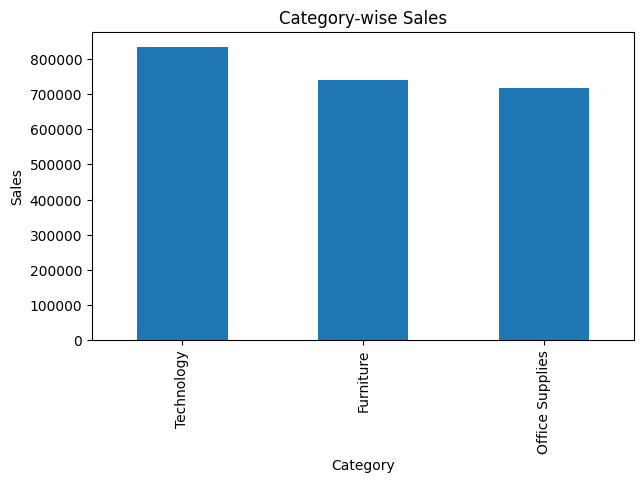

In [32]:
category_analysis["Sales"].plot(kind="bar",figsize=(7,4))
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Category-wise Sales")
plt.show()

### **Sub-Category Profit**

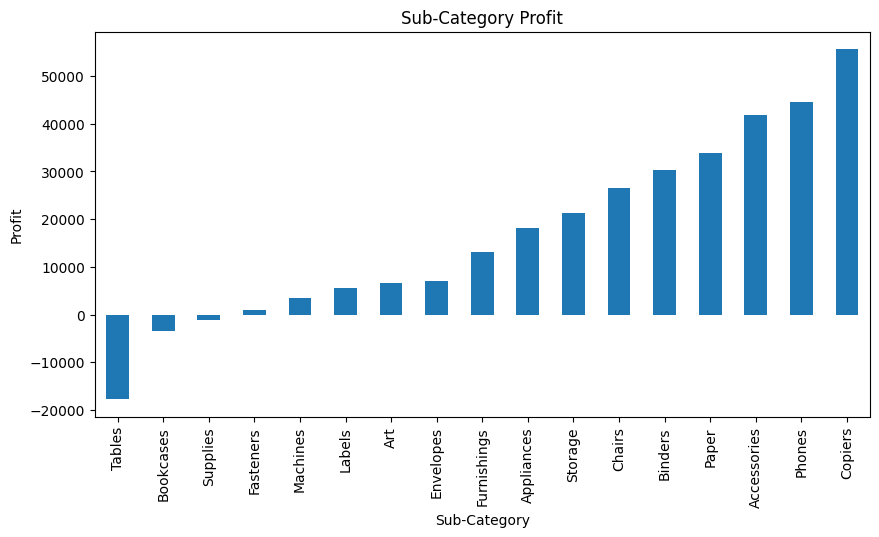

In [35]:
Sub_category_analysis["Profit"].plot(kind="bar",figsize=(10,5))
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.title("Sub-Category Profit")
plt.show()

### **Discount vs Profit**

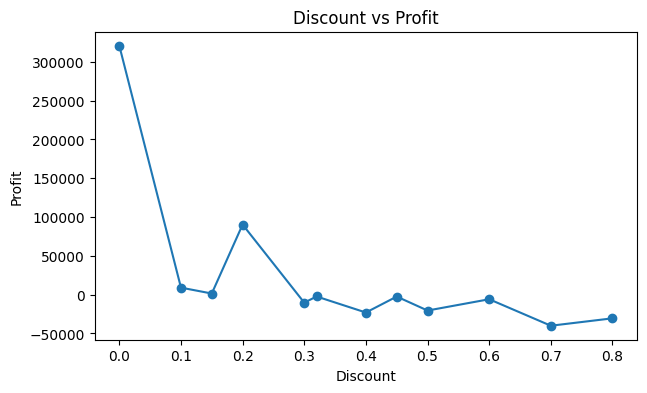

In [36]:
Discount_analysis["Profit"].plot(marker='o',figsize=(7,4))
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Discount vs Profit")
plt.show()


# **INSIGHTS**
---

## *  The Technology category generates the highest sales and profit.

## *  The West region is the most profitable, while the Central region performs the least.

## *  Copiers and Phones are the most profitable sub-categories.

## *  Tables are the highest loss-making sub-category.

## *  Higher discounts reduce overall profit.